"Note: You can filter this dataset by selecting a column and then by clicking ""Filter Views"" --> ""Create new temporary filter"". You can download this data by clicking ""File --> Download"" (unfortunately, these functions may not be available due to high traffic in the document). 

Dataset
This dataset was compiled by the team at Prof G. It includes data on 438 US universities and colleges ranked by US News & World Report's top National University and National College rankings. This dataset compiles data from the Integrated Postsecondary Education Data System (IPEDS) maintained by the US Department of Education, US News & World Report, Google Keyword Planner, Niche.com's Student Life Scores, and the Center on Education & the Workforce. IPEDS. data is self-reported by each school. This dataset/scores should not be taken as peer-reviewed or final. It is a working document that seeks to analyze and understand the US college & university landscape. We've excluded universities and colleges that we do not have complete data for.

Scores
This document gives schools two scores. A Value-to-Cost Ratio, which seeks to quantify each school's value relative to its tuition cost, and a Vulnerability Score, which seeks to quantify a school's vulnerability to Covid-19. The Value-to-Cost Ratio is based on three metrics: Credential (the school's reputation and ability to serve as a career accelerant), Experience (the enrichment potential of the on-campus and community aspects of the school), and Education (the caliber of instruction and its long term impact). We chose from the available data measures that best quantified these considerations and then calculated each school's relative position on these measures to determine a score for each metric. We multipled scores for these three metrics and divided by a tuition score to create a ratio. A Value-to-Cost Ratio of 1.00 indicates that a school's value is proportional to its tuition cost. For Vulnerability, low endowment and dependence on full-tuition international students make a university vulnerable to Covid shock, as they may decide to sit this semester/year out. 

Note: This data should be taken as directional and relative -- we use percent rank to evaluate each metric relative to the 438 schools analyzed. There are many variables not included here that may bolster this scoring -- some of which we've thought of but have not yet found strong datasets (i.e. universities with hospitals or a high share of students who commute are likely less vulnerable) and some we have likely not thought of. Higher education faces an unprecedented crisis in the wake of the COVID-19 pandemic; we hope this data can help us see the outlines of this crisis, and advance the discussion towards facing it. We welcome suggestions, thoughts, pushback, or things we may have missed at feedback@section4.com.

Categorizations (more information here): Schools have been categorized into four buckets: 1) Thrive: High Value, Low Vulnerability, 2) Survive: High Value, High Vulnerability, 3) Struggle: Low Value, Low Vulnerability, 4) Perish: Low Value, High Vulnerability

Update (as of 7/22/20): Changes have been made to this sheet since publication of the USS University blog post, so a few school's category assignments may have changed. This includes the addition of Penn State and Sewanee (erroniously deleted) and CU-Boulder (after finding complete data). We also updated search volume numbers for ~20 schools to account for more colloquial search terms (i.e. Georgia Tech vs. Georgia Institute of Technology) and have updated a few international student numbers which were inaccurately reported by schools to the IPEDS, and we were able to find accurate numbers on the school's website."											

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib


df = pd.read_csv('us_higher_ed_value.csv')

In [2]:
pd.options.display.max_rows = 999
#df

In [3]:
df.rename(columns = {'Eduation Score': 'Education Score','Prof G Categorization': 'Categorization'}, inplace=True)


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Institution Name                                    438 non-null    object 
 1   Full Time Enrollment                                438 non-null    int64  
 2   State                                               438 non-null    object 
 3   Ranking List                                        438 non-null    object 
 4   Rank                                                438 non-null    int64  
 5   Rank Pct Rank                                       438 non-null    float64
 6   Undergraduate Admit Rate                            438 non-null    float64
 7   Undergraduate Admit Rate Pct Rank                   438 non-null    float64
 8   Average Monthly Search Volume                       438 non-null    int64  
 9  

In [5]:
df['Full Time Enrollment']

0       6562
1        998
2       1509
3       1724
4      11435
5       1855
6      46180
7      25806
8       2534
9       1295
10      7194
11      1119
12     15926
13      2121
14      2519
15      1832
16     16451
17      2762
18      7521
19      1228
20       780
21      1631
22      3555
23     15748
24      4656
25      1261
26     13165
27     28287
28      1825
29     14323
30      5267
31     30162
32      9648
33      1632
34      3621
35      2233
36     21444
37      5457
38      2077
39     13160
40     10662
41      4257
42       549
43      1077
44     15966
45      1433
46      8598
47      1790
48      1324
49      2944
50       878
51      3651
52     21940
53      1392
54      2000
55      2944
56      1764
57       322
58      2913
59      7986
60      2106
61      5801
62     25601
63     26072
64      2041
65      3722
66      1798
67      1019
68     23499
69      1008
70      7119
71     10988
72      2062
73      3077
74      6436
75      1843
76      2365

In [6]:
# df
# df.info()

In [7]:
df['Rank']

0      166
1       58
2      140
3       82
4       77
5        2
6      117
7      104
8       92
9      117
10     228
11     254
12     192
13      62
14      25
15      21
16      79
17     197
18     166
19      82
20      89
21      46
22     197
23      79
24     185
25     140
26      37
27      40
28       6
29     246
30      40
31      77
32      14
33      27
34      35
35      12
36     211
37     272
38       7
39      25
40      40
41     139
42     157
43     160
44     240
45      53
46     125
47     185
48       7
49      91
50     218
51     117
52      70
53     130
54      11
55      17
56      82
57      82
58      27
59      40
60      27
61      84
62     166
63       3
64     132
65     281
66      46
67      68
68      17
69     148
70     104
71     228
72     263
73     281
74      12
75      17
76      43
77     125
78      46
79      46
80     130
81     117
82      97
83      10
84     132
85      80
86     228
87     140
88     202
89     105
90      84

In [8]:
vulnerable = df[['Institution Name', 'State','Vulnerability Score', 'Rank']]

In [9]:
vulnerable.sort_values('Vulnerability Score', ascending=False)

,Institution Name,State,Vulnerability Score,Rank
317,University of California-Santa Cruz,CA,1.90,84
311,University of California-Davis,CA,1.87,39
312,University of California-Irvine,CA,1.85,36
316,University of California-Santa Barbara,CA,1.81,34
274,Stony Brook University,NY,1.79,91
95,Florida International University,FL,1.78,218
315,University of California-San Diego,CA,1.70,37
345,University of Massachusetts-Boston,MA,1.69,228
158,Long Island University,NY,1.65,240
344,University of Massachusetts-Amherst,MA,1.64,64


In [10]:
# average vulnerability score by state
vulnerable_by_state = vulnerable.groupby('State')[['Vulnerability Score', 'Rank']].mean().round(2)

In [11]:
vulnerable_by_state.sort_values('Vulnerability Score', ascending=False)

,Vulnerability Score,Rank
State,,
HI,1.38,166.00
FL,1.36,162.36
AZ,1.30,117.00
NJ,1.17,112.00
CA,1.17,73.42
NM,1.14,184.33
MT,1.10,250.00
NY,1.09,100.90
IL,1.06,108.35


In [12]:
ten_most_vul = df[['Institution Name','State','Vulnerability Score']].sort_values('Vulnerability Score', ascending=False).head(10)
ten_most_vul

,Institution Name,State,Vulnerability Score
317,University of California-Santa Cruz,CA,1.90
311,University of California-Davis,CA,1.87
312,University of California-Irvine,CA,1.85
316,University of California-Santa Barbara,CA,1.81
274,Stony Brook University,NY,1.79
95,Florida International University,FL,1.78
315,University of California-San Diego,CA,1.70
345,University of Massachusetts-Boston,MA,1.69
158,Long Island University,NY,1.65
344,University of Massachusetts-Amherst,MA,1.64


In [13]:
#by vulnerability score
ten_least_vul = df[['Institution Name','State','Vulnerability Score']].sort_values('Vulnerability Score', ascending=False).tail(10)
ten_least_vul

,Institution Name,State,Vulnerability Score
411,Washington College,MD,0.30
127,Hendrix College,AR,0.29
299,Transylvania University,KY,0.27
262,Spelman College,GA,0.26
284,Texas A & M University-College Station,TX,0.25
297,Thomas Jefferson University,PA,0.23
217,Randolph College,VA,0.22
404,Virginia Military Institute,VA,0.19
42,Centenary College of Louisiana,LA,0.15
177,Middlebury College,VT,0.14


In [14]:
cat_by_state = df.groupby('State')
cat_by_state = cat_by_state['Categorization'].value_counts()
cat_by_state = cat_by_state.unstack().fillna('-')
cat_by_state

Categorization,Perish,Struggle,Survive,Thrive
State,,,,
AK,-,-,-,1
AL,1,1,1,3
AR,1,1,-,1
AZ,-,-,2,-
CA,6,5,15,5
CO,-,1,5,1
CT,2,4,2,1
DC,-,1,2,3
DE,-,-,-,1


In [15]:
ny_state_cat = cat_by_state.loc['NY']
ny_state_cat.to_frame()

,NY
Categorization,
Perish,13
Struggle,7
Survive,14
Thrive,5


In [16]:
# df.info()

In [17]:
ny_state = df['State']=='NY'
df_ny_state = df.loc[ny_state, :]
df_ny_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 437
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Institution Name                                    39 non-null     object 
 1   Full Time Enrollment                                39 non-null     int64  
 2   State                                               39 non-null     object 
 3   Ranking List                                        39 non-null     object 
 4   Rank                                                39 non-null     int64  
 5   Rank Pct Rank                                       39 non-null     float64
 6   Undergraduate Admit Rate                            39 non-null     float64
 7   Undergraduate Admit Rate Pct Rank                   39 non-null     float64
 8   Average Monthly Search Volume                       39 non-null     int64  
 9   

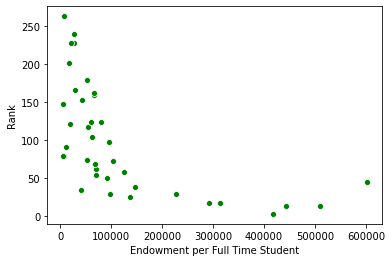

In [18]:
ax =sns.scatterplot(x = 'Endowment per Full Time Student' , y = 'Rank', data = df_ny_state, color = 'green', marker = "o")

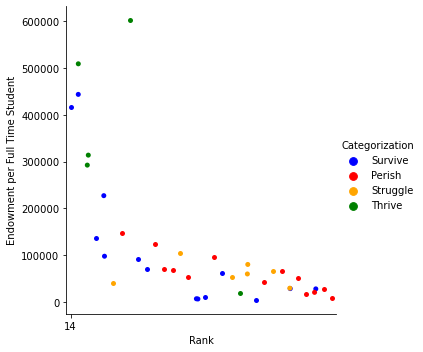

In [50]:
#not this as I don't want to estimate or agg the rank. how to show rank in bins w/histogram type chart?
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
ax = sns.catplot(x = 'Rank', y = 'Endowment per Full Time Student',  hue = 'Categorization', data = df_ny_state, palette = ["blue", "red", "orange",'green'], ci = True, height = 5, aspect = 1)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.FixedLocator(nbins=5))

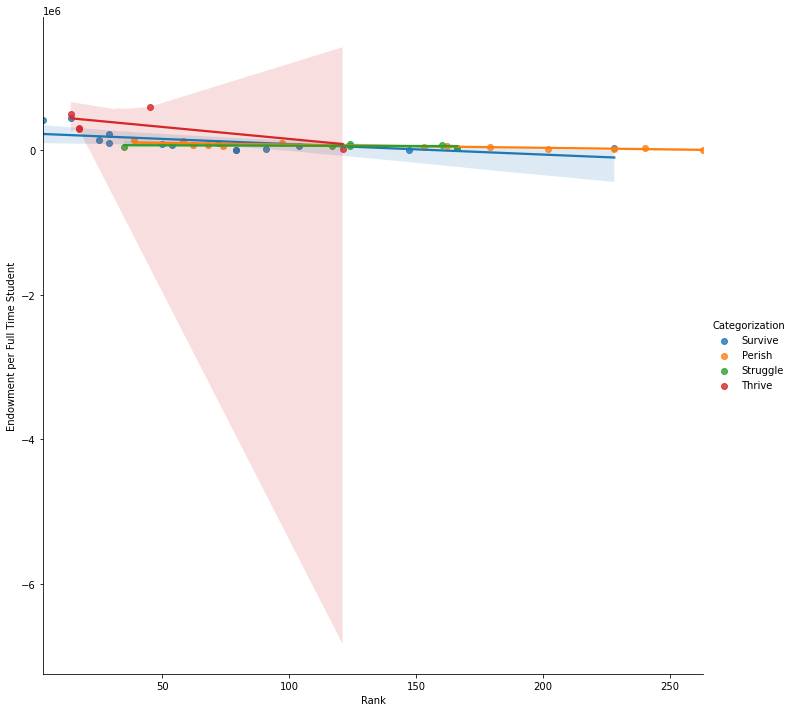

In [20]:
ax = sns.lmplot(x = "Rank", y = "Endowment per Full Time Student", data = df_ny_state, hue="Categorization", height = 10, aspect = 1)

In [21]:
# # sns.pairplot(df)
# sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
# sns.pairplot(df[['Full Time Enrollment','Percentage of International Students','Instructional Wages per Full-Time Student', 'Vulnerability Score']], plot_kws = {"color": "green"}, height = 10)

TypeError: __init__() missing 1 required positional argument: 'offset'

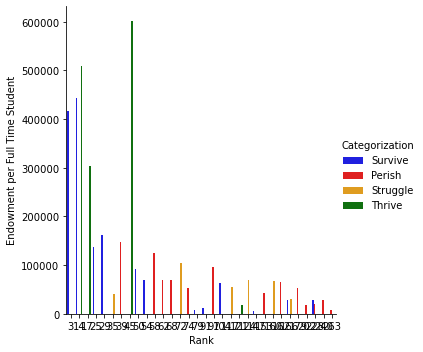

In [76]:
#sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
#ax.xticks([0, 50, 100, 150, 200, 250])
#plt.xticks([0, 50, 100, 150, 200, 250])

ax = sns.catplot(x="Rank", y="Endowment per Full Time Student", hue="Categorization", kind="bar", data=df_ny_state, palette = ["blue", "red", "orange",'green'], ci=False)
ax = plt.gca()
x = [0, 50, 100, 150, 200, 250]
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1))



In [23]:
df_ny_state[['Institution Name', 'Rank', 'Endowment per Full Time Student','Value-to-Cost Ratio','Average Undergraduate Tuition and Fees','Credential Score','Vulnerability Score','Categorization']].sort_values('Value-to-Cost Ratio', ascending=True)

,Institution Name,Rank,Endowment per Full Time Student,Value-to-Cost Ratio,Average Undergraduate Tuition and Fees,Credential Score,Vulnerability Score,Categorization
416,Wells College,124,80313.0,0.014716,40700.0,0.75,0.64,Struggle
291,The Sage Colleges,228,20692.0,0.020612,30857.0,0.18,1.03,Perish
132,Houghton College,124,60000.0,0.023637,32488.0,0.61,0.77,Struggle
270,St. Thomas Aquinas College,35,41182.0,0.042005,31950.0,1.18,0.61,Struggle
123,Hartwick College,160,66872.0,0.059694,45510.0,0.61,0.72,Struggle
247,Sarah Lawrence College,68,68731.0,0.081792,55900.0,1.77,1.28,Perish
158,Long Island University,240,27350.0,0.105615,37763.0,0.72,1.65,Perish
13,Bard College,62,69834.0,0.124106,54680.0,1.85,1.39,Perish
290,The New School,153,42439.0,0.132357,49064.0,1.52,1.59,Perish
128,Hobart William Smith Colleges,72,104531.0,0.150247,55255.0,1.32,0.84,Struggle


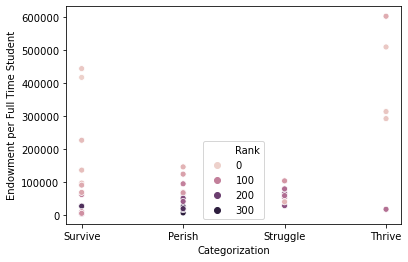

In [24]:
ax =sns.scatterplot(y = 'Endowment per Full Time Student', x='Categorization', data = df_ny_state, hue = 'Rank', color = 'purple', marker = "o")

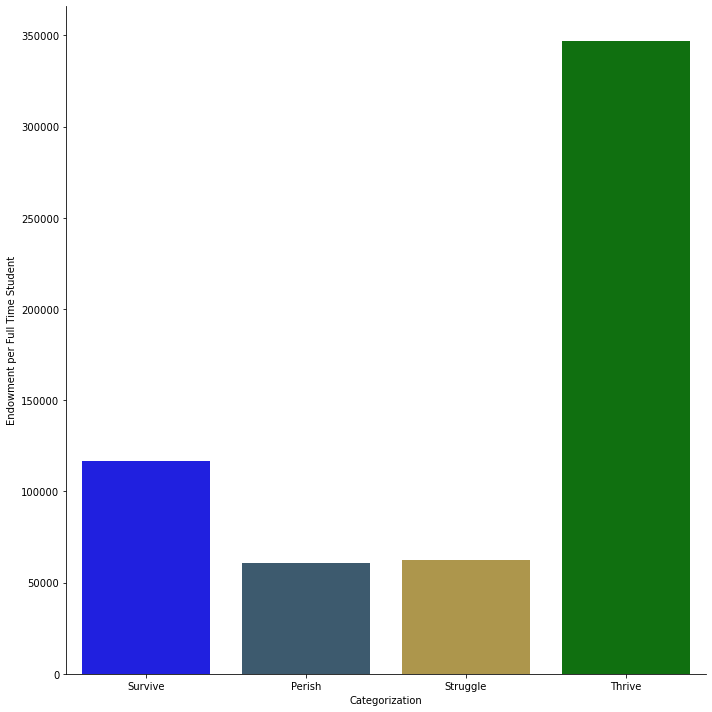

In [68]:
sns.catplot(x="Categorization", y="Endowment per Full Time Student", kind="bar",
            data=df_ny_state, palette = ['blue','#355B76', '#BD9E3C', 'green'], ci=False, height = 10, aspect = 1)
#height = 10, aspect = 1

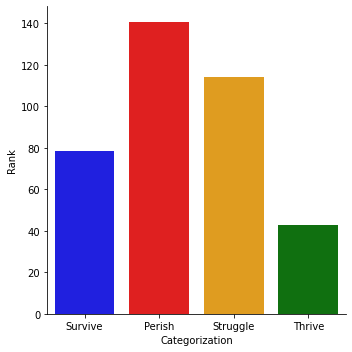

In [26]:
sns.catplot(x="Categorization", y="Rank", kind="bar",
            data=df_ny_state, palette = ["blue", "red", "orange",'green'], ci=False)

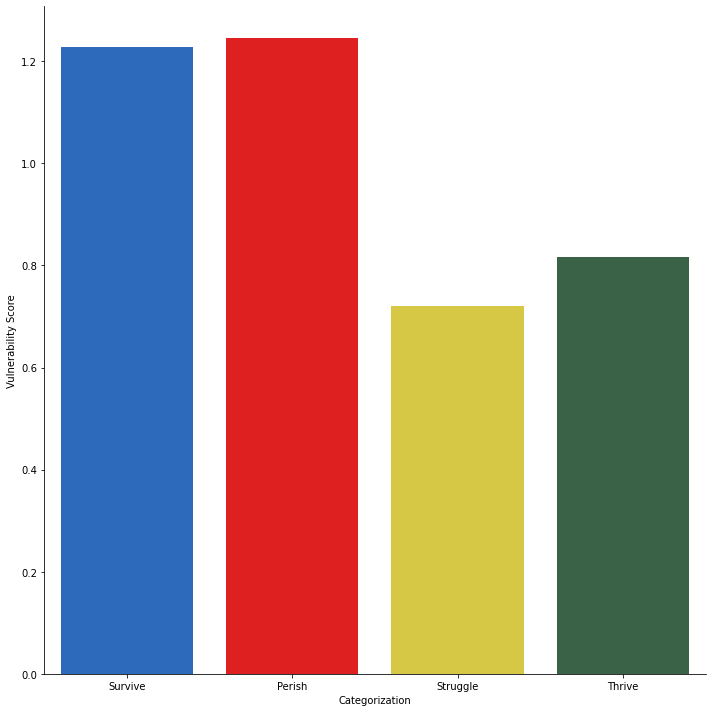

In [72]:
# does this make sense? VS does not seem to be the main driver in determining if a uni survives or not
sns.set_context(font_scale = 2.0)
sns.catplot(x="Categorization", y="Vulnerability Score", kind="bar",
            data=df_ny_state, palette = ["#1666D3", "red", "#EEDC2D",'#336943'], ci=False, height = 10, aspect=1)

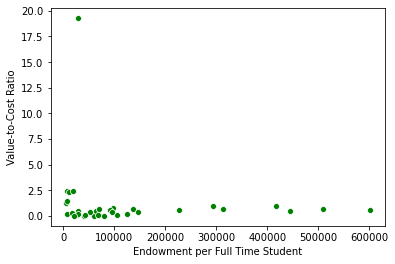

In [28]:
ax =sns.scatterplot(x = 'Endowment per Full Time Student' , y = 'Value-to-Cost Ratio', data = df_ny_state, color = 'green', marker = "o")

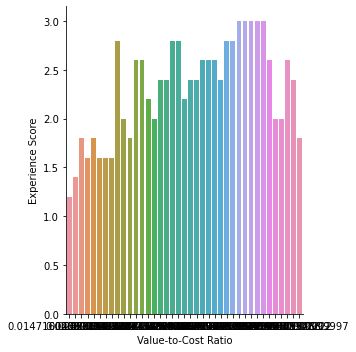

In [69]:
#sns.set(rc={'figure.figsize': (16,3)})
ax = sns.catplot(x="Value-to-Cost Ratio", y="Experience Score", kind="bar",
            data=df_ny_state, palette = ["blue", "red", "orange",'green'], ci=False)

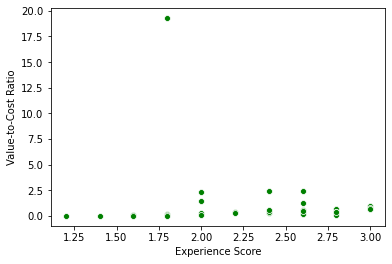

In [30]:
ax =sns.scatterplot(x = 'Experience Score' , y = 'Value-to-Cost Ratio', data = df_ny_state, color = 'green', marker = "o")